<a href="https://colab.research.google.com/github/sharangramana/AI_Assignments/blob/master/image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
%matplotlib inline
from tqdm import tqdm
import numpy as np
#from setting import PROJECT_ROOT
import os
from random import shuffle
import cv2
from google.colab import drive
drive.mount("/content/drive")



Mounted at /content/drive


In [0]:
train_file = "/content/drive/My Drive/train.zip"
test_file = "/content/drive/My Drive/test.zip"

In [0]:
import zipfile
with zipfile.ZipFile(train_file,'r') as z:
  z.extractall()
with zipfile.ZipFile(test_file,'r') as z:
  z.extractall()

In [4]:
ls

drive/  sample_data/  test/  train/


In [0]:
TEST_DIR = "./test/"
TRAIN_DIR = "./train"
LEARNING_RATE = 1e-3
MODEL_NAME = "dogsvscats-{}-{}.model".format(LEARNING_RATE,"6conv-fire")
IMG_SIZE = 50

In [0]:
def label_image(img):
  img_name = img.split(".")[-3]
  if img_name == "cat":
    return[1,0]
  elif img_name == "dog":
    return[0,1]

In [0]:
def create_train_data():
  training_data = []
  
  for img in tqdm(os.listdir(TRAIN_DIR)):
    label = label_image(img)
    path = os.path.join(TRAIN_DIR,img)
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(50,50))
    training_data.append([np.array(img),np.array(label)])
  shuffle(training_data)
  np.save('train_data.npy',training_data)
  return training_data

In [8]:
train_data = create_train_data()

100%|██████████| 25000/25000 [00:22<00:00, 1132.89it/s]


In [9]:
import tflearn
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.estimator import regression

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
convnet = input_data(shape=[None,50,50,1],name ='imput')
convnet = conv_2d(convnet,32,5,activation ='relu')
convnet = max_pool_2d(convnet,5)

convnet = conv_2d(convnet,32,5,activation ='relu')
convnet = max_pool_2d(convnet,5)

#convnet = conv_2d(convnet,32,5,activation ='relu')
#convnet = max_pool_2d(convnet,5)

convnet = conv_2d(convnet,32,5,activation ='relu')
convnet = max_pool_2d(convnet,5)

convnet = conv_2d(convnet,32,5,activation ='relu')
convnet = max_pool_2d(convnet,5)

convnet = fully_connected(convnet,1024,activation = 'relu')
convnet = dropout(convnet,0.8)

convnet = fully_connected (convnet,2,activation='softmax')
convnet = regression(convnet, optimizer = 'adam', learning_rate = LEARNING_RATE,loss = 'categorical_crossentropy',name = 'targets')
model = tflearn.DNN(convnet,tensorboard_dir = 'log')

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [0]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
  model.load(MODEL_NAME)
  print('model_loaded')

In [0]:
train = train_data[:-500]
test = train_data[-500:]


In [0]:
X=np.array([i[0] for i in train]).reshape(-1,50,50,1)
Y= [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,50,50,1)
test_y = [i[1] for i in test]

In [23]:
model.fit(X,Y,n_epoch = 5,validation_set = ({'imput':test_x},{'targets':test_y}),snapshot_step =500,show_metric=True,run_id = MODEL_NAME)

Training Step: 3063  | total loss: 0.35537 | time: 4.310s
| Adam | epoch: 008 | loss: 0.35537 - acc: 0.8437 -- iter: 24448/24500
Training Step: 3064  | total loss: 0.35113 | time: 5.321s
| Adam | epoch: 008 | loss: 0.35113 - acc: 0.8468 | val_loss: 0.52906 - val_acc: 0.7940 -- iter: 24500/24500
--


In [24]:
testing_data = []
for img in tqdm(os.listdir("./test/")):
  path = os.path.join("./test",img)
  img_num = img.split('.')[0]
  img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
  testing_data.append([np.array(img),img_num])
  

100%|██████████| 12500/12500 [00:10<00:00, 1168.54it/s]


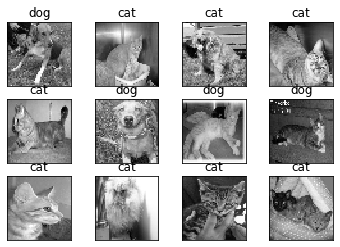

In [26]:
fig = plt.figure()
for num,data in enumerate(testing_data[:12]):
  img_num = data[1]
  img_data = data[0]
  y= fig.add_subplot(3,4,num+1)
  orig = img_data
  data = img_data.reshape(50,50,1)
  model_out = model.predict([data])[0]
  if np.argmax(model_out)==1: str_label = 'dog'
  else: str_label = 'cat'
    
  y.imshow(orig,cmap = 'gray')
  plt.title(str_label)
  y.axes.get_xaxis().set_visible(False)
  y.axes.get_yaxis().set_visible(False)
plt.show()